In [ ]:
import pandas as pd #data manipulation
import plotly.express as ps #data visualization
from fbprophet import Prophet # forecasting
import plotly.io as pio  #initialising plotly to use it
pio.renderers.default ='colab'

In [ ]:
df=pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1593701871&period2=1625237871&interval=1d&events=history&includeAdjustedClose=true")
df.info()
   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-02,244.296005,245.600006,237.119995,241.731995,241.731995,86250500
1,2020-07-06,255.337997,275.558014,253.207993,274.316010,274.316010,102849500
2,2020-07-07,281.002014,285.899994,267.342010,277.971985,277.971985,107448500
3,2020-07-08,281.000000,283.451996,262.268005,273.175995,273.175995,81556500
4,2020-07-09,279.398010,281.712006,270.256012,278.855988,278.855988,58588000


In [ ]:
ps.area(df, x="Date",y="Close")

In [ ]:
ps.line(df, x="Date",y="Close")

In [ ]:
ps.area(df, x="Date",y="Volume")

In [ ]:
ps.bar(df,y="Volume")

In [ ]:
ps.box(df,y="Close")

In [ ]:
columns=['Date',"Close"]
ndf=pd.DataFrame(df,columns=columns)
ndf

,Date,Close
0,2020-07-02,241.731995
1,2020-07-06,274.316010
2,2020-07-07,277.971985
3,2020-07-08,273.175995
4,2020-07-09,278.855988
...,...,...
248,2021-06-28,688.719971
249,2021-06-29,680.760010
250,2021-06-30,679.700012
251,2021-07-01,677.919983


In [ ]:
phrophet_df=ndf.rename(columns={'Date':'ds','Close':'y'})
phrophet_df

,ds,y
0,2020-07-02,241.731995
1,2020-07-06,274.316010
2,2020-07-07,277.971985
3,2020-07-08,273.175995
4,2020-07-09,278.855988
...,...,...
248,2021-06-28,688.719971
249,2021-06-29,680.760010
250,2021-06-30,679.700012
251,2021-07-01,677.919983


In [ ]:
#create facebook phrophet model
m=Prophet()
m.fit(phrophet_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#forecasting
future=m.make_future_dataframe(periods=15)
forecast=m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-02,264.981404,194.721011,341.116283,264.981404,264.981404,4.311650,4.311650,4.311650,4.311650,4.311650,4.311650,0.0,0.0,0.0,269.293055
1,2020-07-06,271.676819,210.844533,340.789272,271.676819,271.676819,2.647086,2.647086,2.647086,2.647086,2.647086,2.647086,0.0,0.0,0.0,274.323905
2,2020-07-07,273.350673,204.625503,352.686312,273.350673,273.350673,5.945053,5.945053,5.945053,5.945053,5.945053,5.945053,0.0,0.0,0.0,279.295725
3,2020-07-08,275.024526,211.629179,354.322648,275.024526,275.024526,5.138765,5.138765,5.138765,5.138765,5.138765,5.138765,0.0,0.0,0.0,280.163291
4,2020-07-09,276.698380,214.943643,351.174015,276.698380,276.698380,4.311650,4.311650,4.311650,4.311650,4.311650,4.311650,0.0,0.0,0.0,281.010031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,2021-07-13,577.623724,512.767340,652.947759,575.987547,579.454449,5.945053,5.945053,5.945053,5.945053,5.945053,5.945053,0.0,0.0,0.0,583.568777
264,2021-07-14,576.443818,510.719139,652.453461,574.534955,578.552754,5.138765,5.138765,5.138765,5.138765,5.138765,5.138765,0.0,0.0,0.0,581.582582
265,2021-07-15,575.263911,507.583214,651.060554,573.097923,577.746336,4.311650,4.311650,4.311650,4.311650,4.311650,4.311650,0.0,0.0,0.0,579.575562
266,2021-07-16,574.084004,506.862777,645.654782,571.580323,576.876205,5.694602,5.694602,5.694602,5.694602,5.694602,5.694602,0.0,0.0,0.0,579.778606


In [ ]:
ps.line(forecast,x='ds',y='yhat')

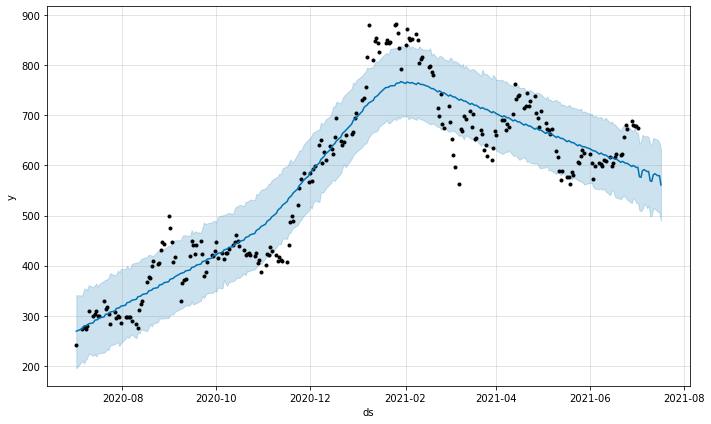

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

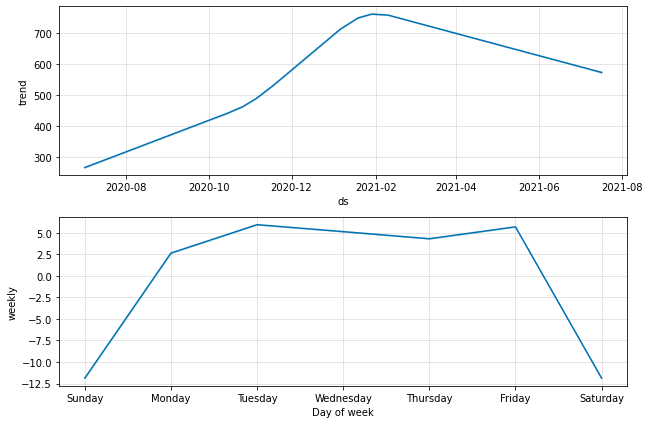

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
#downloading forecast data
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>